# Exercise Set 2: 0-1 Knapsack Problem

## Setup items

In [ ]:
import random


NBR_ITEMS = 100
MAX_WEIGHT = 1000

# set the random seed. Make sure you do this BEFORE creating the knapsack
# creating the knapsack
RANDOM_SEED = 42
random.seed(RANDOM_SEED)

# Create the item dictionary: item name is an integer, and value is
# a (value, weight) 2-uple.

items = {}

# Create random items and store them in the items' dictionary.
for i in range(NBR_ITEMS):
    items[i] = (random.randint(1, 10), random.randint(1, 100))

## Fitness function

In [5]:
def fitnessCal(individual):
    weight = 0
    value = 0
    for i in range(NBR_ITEMS):
        if individual[i] == 1:
            value += items[i][0]
            weight += items[i][1]
    # punish if overweight, more if overweight by more
    if weight > MAX_WEIGHT:
        return MAX_WEIGHT - weight,
    return value,

## GA

### Prepare GA

In [6]:
from deap import base
from deap import creator
from deap import tools

creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax) # type: ignore

toolbox = base.Toolbox()

# Attribute generator - binary decision for each item (0 or 1)
toolbox.register("zeroOrOne", random.randint, 0, 1)

# Structure initializers
toolbox.register(
    "individualCreator",
    tools.initRepeat,
    creator.Individual,
    toolbox.zeroOrOne,
    NBR_ITEMS,
)

toolbox.register("populationCreator", tools.initRepeat, list, toolbox.individualCreator)

# Register the evaluation function (fitness)
toolbox.register("evaluate", fitnessCal)

# Register the genetic operators
toolbox.register("select", tools.selTournament, tournsize=3)  # Selection
toolbox.register("mate", tools.cxTwoPoint)  # Crossover
toolbox.register("mutate", tools.mutFlipBit, indpb=1.0/NBR_ITEMS)  # Mutation

/home/tu/micromamba/lib/python3.9/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/home/tu/micromamba/lib/python3.9/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [47]:
MAX_GENERATIONS = 250

def runGA(crossoverRate, mutationRate):
    population = toolbox.populationCreator(n=500)
    generationCount = 0
    
    hallOfFame = tools.HallOfFame(1)

    # Evaluate the entire population
    fitnesses = list(map(toolbox.evaluate, population))
    for ind, fitness in zip(population, fitnesses):
        ind.fitness.values = fitness

    fitnesses = [ind.fitness.values[0] for ind in population]
    maxFitnesses = []
    meanFitnesses = []
    
    # Begin the evolution
    while generationCount < MAX_GENERATIONS:
        generationCount += 1
        
        # select 
        offspring = toolbox.select(population, len(population))
        offspring = list(map(toolbox.clone, offspring))
        
        # crossover
        for child1, child2 in zip(offspring[::2], offspring[1::2]):
            if random.random() < crossoverRate:
                toolbox.mate(child1, child2)
                del child1.fitness.values
                del child2.fitness.values
                
        # mutation
        for mutant in offspring:
            if random.random() < mutationRate:
                toolbox.mutate(mutant)
                del mutant.fitness.values
                
        # re-evaluate the fitness of the modified population
        freshInds = [ind for ind in offspring if not ind.fitness.valid]
        freshFitnesses = list(map(toolbox.evaluate, freshInds))
        
        for individual, fitness in zip(freshInds, freshFitnesses):
            individual.fitness.values = fitness
            
        # replace the old population with the modified population
        population[:] = offspring
        fitnesses = [ind.fitness.values[0] for ind in population]
        
        maxFitness = max(fitnesses)
        meanFitness = sum(fitnesses) / len(population)
        maxFitnesses.append(maxFitness)
        meanFitnesses.append(meanFitness)
        
        hallOfFame.update(population)
    return hallOfFame, maxFitnesses, meanFitnesses

### Run GA  

1. Write a GA to maximise the value without going over the weight limit, using a population of 500. You can vary any other parameters that you like;
1. Identify the best individual and fitness you can find (we've managed 281 so far). Also, identify the total weight of the objects for the best individual;
1. Plot a graph of mean best and mean average performance for at least two experimental set ups.

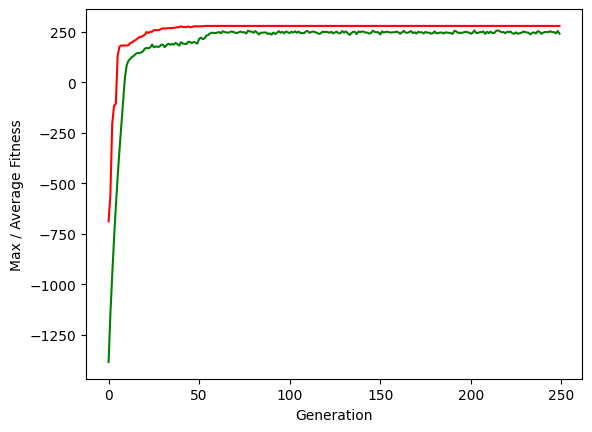

Best individual is: [1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0]
with fitness: (279.0,)


In [53]:
import matplotlib.pyplot as plt

hof, maxFitnesses, meanFitnesses = runGA(0.8, 0.2)

plt.plot(maxFitnesses, color='red')
plt.plot(meanFitnesses, color='green')
plt.xlabel('Generation')
plt.ylabel('Max / Average Fitness')
plt.show()

print("Best individual is: %s\nwith fitness: %s" % (hof[0], hof[0].fitness.values))


In [54]:

print("Total weight: %s" % sum(items[i][1] for i in range(NBR_ITEMS) if hof[0][i] == 1))

Total weight: 997


### Second graph 

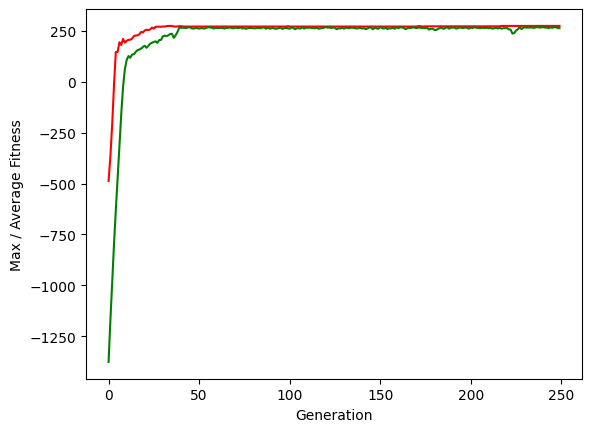

Best individual is: [1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0]
with fitness: (274.0,)


In [51]:
hof, maxFitnesses, meanFitnesses = runGA(0.9, 0.05)

plt.plot(maxFitnesses, color="red")
plt.plot(meanFitnesses, color="green")
plt.xlabel("Generation")
plt.ylabel("Max / Average Fitness")
plt.show()

print("Best individual is: %s\nwith fitness: %s" % (hof[0], hof[0].fitness.values))